# Shape of Contour

## GOAL
* Detect contours in the image
* Find Shape of contour with openCV and python

##  STEPS
* Grayscale the image
* Blur to reduce the noise in image
* Threshold to apply binarization in image
* Find the contour
* Algo Used - contour approximation - RAMER_DOUGLAS_PEUCKER
* Find the number of sides
* Based on no of sides - Give the name of shape

## Algorithm
- assumption - curve can be approximated by a series of
    short line segments resulting in approximated curve
    that consist of subset of points of orignal curve
- approxPolyDouglasPuecker(c, 1-5% of perimeter)

In [39]:
# importing the required libraries
from shape_detector import ShapeDetector
import matplotlib.pyplot as plt
import cv2
import imutils

In [40]:
# function to display the image
def show(image,cmap=None):
    plt.imshow(image,cmap=cmap)
    plt.show()

In [41]:
# loading the image
image = cv2.imread('contour.jpg')
ratio = 1
# resized = imutils.resize(image, width=300)
# ratio = image.shape[0] / float(resized.shape[0])
# image = resized.copy()

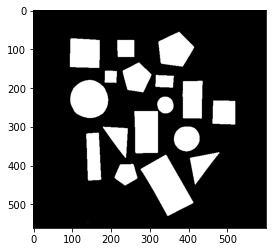

In [42]:
# Preprocessing the image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5,5), 0)
T, thresh = cv2.threshold(blur, 60, 255, cv2.THRESH_BINARY)
show(thresh, cmap='gray')

In [43]:
# grab the contours
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

In [44]:
sd = ShapeDetector()

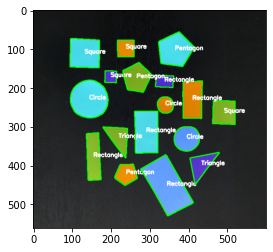

In [47]:
# processing the contours grabbed
# moments - contain the characteristics of the shape

green = (0,255,0)
white = (255,255,255)

for c in cnts:
    M = cv2.moments(c)
    try:
        cX = int((M['m10'] / M['m00'])*ratio)
        cY = int((M['m01'] / M['m00'])*ratio)
    except:
        # the first value is 0 - zero division error
        continue

    shape = sd.detect(c)
    cv2.drawContours(image, [c], -1, green, 2)
    cv2.putText(image, shape, (cX, cY), cv2.FONT_HERSHEY_SIMPLEX, 0.5, white, 2)
    # print(shape)    
show(image)
